# Evaluation Project 3: HR Analytics Project- Understanding the Attrition in HR

# Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

# Imorting all the necessary libraries:

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load the Data Set:

In [2]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# HR Analytics:
     It aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.
     
# Attrition in HR:
      Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

# Description:
    Here, we are having columns like age,buisiness travell, daily rate, Department, DistanceFromHome, Education, 
    EducationField,EmployeeNumber,.....etc of an organisation employee details.We need to predict how,does attrition 
    effect the company.

In [3]:
 #To get the data dimension 
df.shape

(1470, 35)

In [4]:
#To get all the information regarding data set:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df['Attrition'].value_counts() #To check the count of values in target variable('Attrition ')

No     1233
Yes     237
Name: Attrition, dtype: int64

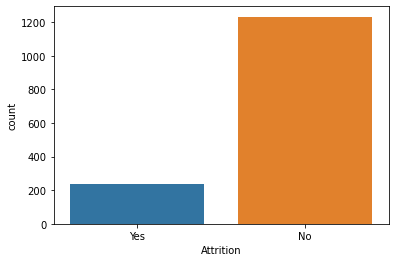

In [6]:
sns.countplot(x='Attrition',data=df)
plt.show()

There is imbalance problem which need to be resolved futher

In [7]:
df.isnull().sum() #checking the null value count of all the coulumns

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no null values in the dataset

# Describing Data Set:

In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Label Encoding:

In [9]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Attrition']=LE.fit_transform(df['Attrition'])
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

label Encoder is needeed to convert 'Attrition' target variable in to numeric values so that it is used to check correlaion of feautures and label

In [12]:
df['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [13]:
df['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

Since,these columns have no effect in predicting the effectiveness of organisation,we are dropping those columns further.

In [17]:
df=df.drop(columns=['EmployeeCount','StandardHours'],axis=1)

# OrdinalEncoder:
ordinal encoding is used to convert AlL the feature object data to numerical.

In [22]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=ord_enc.fit_transform(df[i].values.reshape(-1,1))


In [23]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,1.0,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1.0,8,1,1.0,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4.0,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1.0,3,4,1.0,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,3.0,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1.0,884,1.0,23,2,3.0,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2.0,613,1.0,6,1,3.0,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2.0,155,1.0,4,3,1.0,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1.0,1023,2.0,2,3,3.0,2065,4,...,3,4,0,17,3,2,9,6,0,8


In [26]:
df['Over18'].value_counts()

0.0    1470
Name: Over18, dtype: int64

In [27]:
df=df.drop(columns=['Over18'],axis=1)

# Correlation:

# Correlation Using Heatmap:

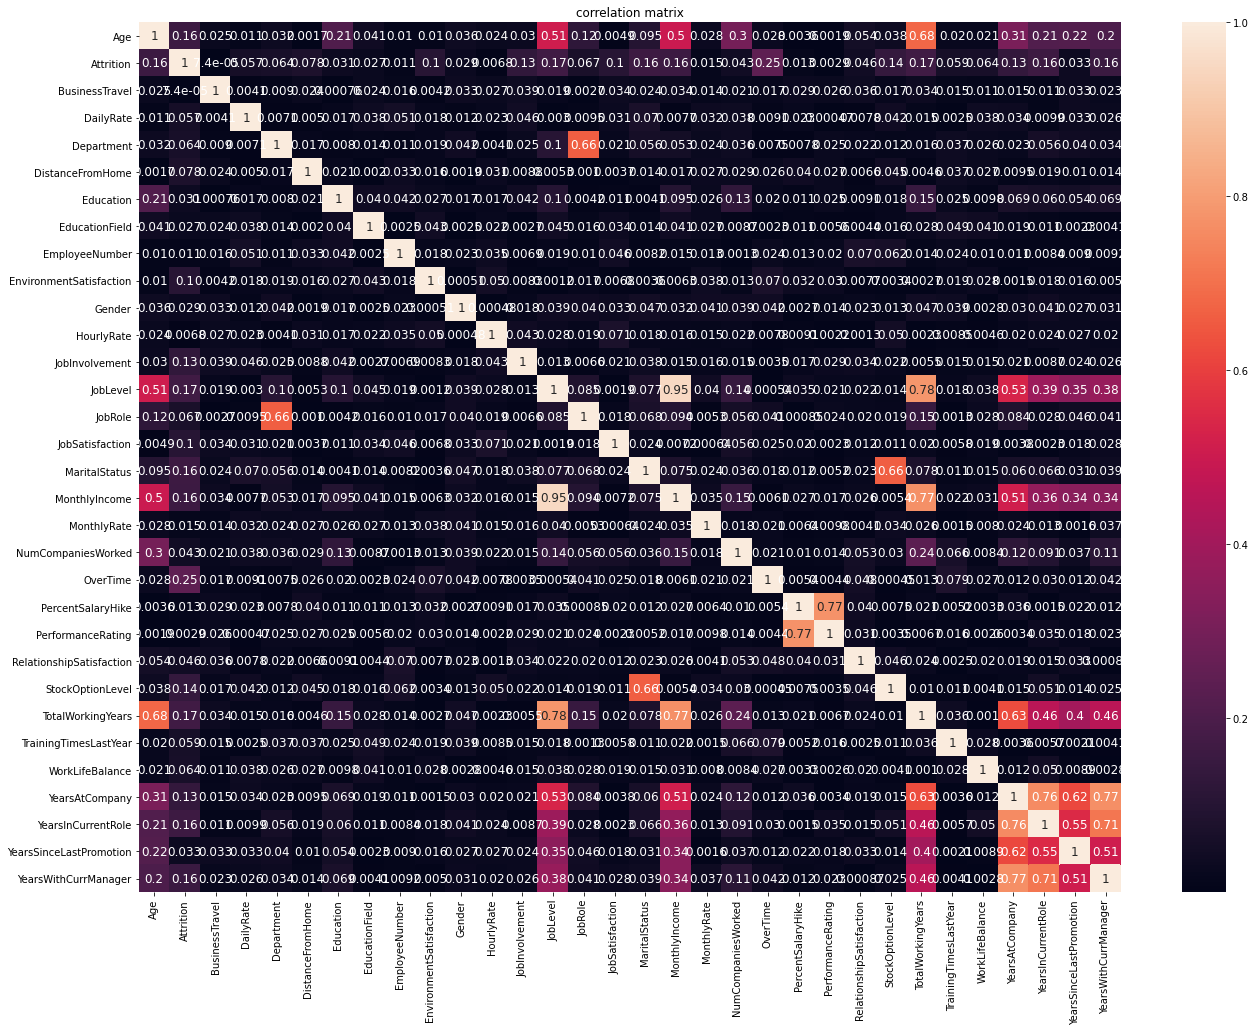

In [28]:
df_corr=df.corr().abs()

plt.figure(figsize=(22,16))
sns.heatmap(df_corr,annot=True,annot_kws={'size':12})
plt.title('correlation matrix')
plt.show()    

In [29]:
corr=df.corr()
corr['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
A

correlation of all the features with respect to the target variable is given above

# Checking outliers:

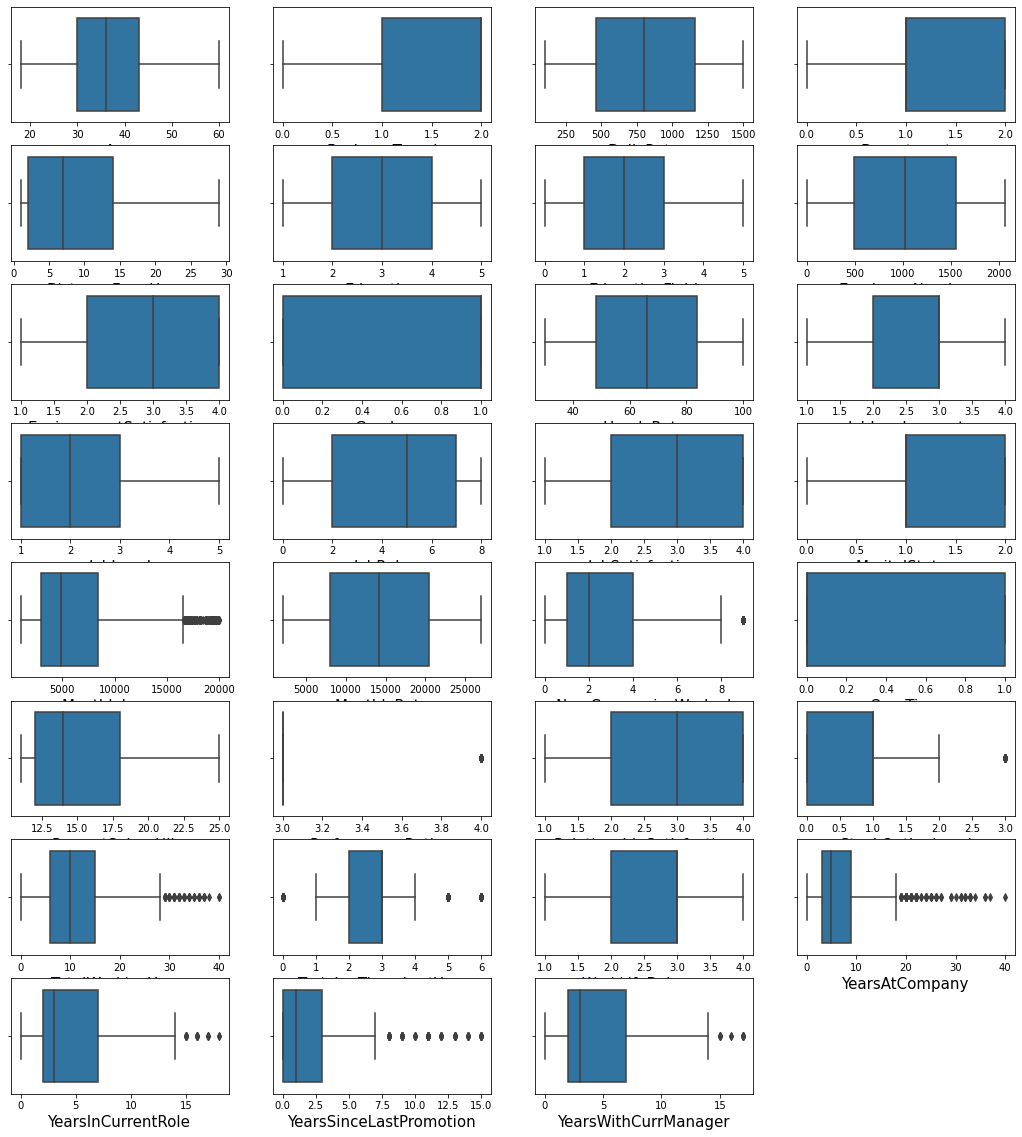

In [33]:
x=df.drop(columns=['Attrition'])
plt.figure(figsize=(18,20))
graph=1
for column in x:
    if graph<=32:
        ax=plt.subplot(8,4,graph)
        sns.boxplot(x[column],orient='v')
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()    

From the above outcome we can see that few of the columns has outliers which can effect the score.

# Skewness:

In [34]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
W

Skewness threshold is taken as +/-0.5.Columns which are having skewness which effects the model are:
    
BusinessTravel ,DistanceFromHome,JobLevel,MonthlyIncome,NumCompaniesWorked,OverTime,PerformanceRating ,TotalWorkingYears ,
YearsAtCompany,YearsSinceLastPromotion

To remove skewness columns which effect the model drop columns are used.

In [35]:
df=df.drop(columns=['BusinessTravel','DistanceFromHome','JobLevel','MonthlyIncome','NumCompaniesWorked','OverTime','PerformanceRating',
                   'TotalWorkingYears','YearsAtCompany','YearsSinceLastPromotion'],axis=1)

In [36]:
df.shape

(1470, 22)

# Removing Outliers using Z score Technique:

In [37]:
from scipy.stats import zscore
import numpy as np
zsc=zscore(df)
abs_z_score=np.abs(zsc)
filtering_entry=(abs_z_score<3).all(axis=1)
df=df[filtering_entry]

In [38]:
df

,Age,Attrition,DailyRate,Department,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobSatisfaction,MaritalStatus,MonthlyRate,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsWithCurrManager
0,41,1,1102,2.0,2,1.0,1,2,0.0,94,...,4,2.0,19479,11,1,0,0,1,4,5
1,49,0,279,1.0,1,1.0,2,3,1.0,61,...,2,1.0,24907,23,4,1,3,3,7,7
2,37,1,1373,1.0,2,4.0,4,4,1.0,92,...,3,2.0,2396,15,2,0,3,3,0,0
3,33,0,1392,1.0,4,1.0,5,4,0.0,56,...,3,1.0,23159,11,3,0,3,3,7,0
4,27,0,591,1.0,1,3.0,7,1,1.0,40,...,2,1.0,16632,12,4,1,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,1.0,2,3.0,2061,3,1.0,41,...,4,1.0,12290,17,3,1,3,3,2,3
1466,39,0,613,1.0,1,3.0,2062,4,1.0,42,...,1,1.0,21457,15,1,1,5,3,7,7
1467,27,0,155,1.0,3,1.0,2064,2,1.0,87,...,2,1.0,5174,20,2,1,0,3,2,3
1468,49,0,1023,2.0,3,3.0,2065,4,1.0,63,...,2,1.0,13243,14,4,0,3,2,6,8


There are only 1445 rows and 22 columns afer removing the outliers

# Percentage data loss:

In [40]:
loss_percent=(1470-1445)/1470*100
loss_percent

1.7006802721088436

# Dividing the features and label columns as 'x' and 'y' and scaling the features:

In [42]:
x=df.drop(columns='Attrition')
y=df.Attrition

In [44]:
from sklearn.preprocessing import StandardScaler

scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)


# Finding the best Random State:

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

In [47]:
knn=KNeighborsClassifier()
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    knn.fit(x_train,y_train)
    pred_test=knn.predict(x_test)
    acc=accuracy_score(y_test,pred_test)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
        
print('Best accuracy is: ',maxacc,'Best state is: ',maxrs)

Best accuracy is:  0.8788927335640139 Best state is:  8


We have found that best random state is '8'. We will create our train-test split using this random state.

# Creating train-test split:

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=8)


# Balancing the data set:

In [53]:
import six
import sys
sys.modules['sklearn.external.six']=six
from imblearn.over_sampling import SMOTE

sm=SMOTE()
over_samp=SMOTE(0.80)
x_train_ns,y_train_ns=over_samp.fit_sample(x_train,y_train)

In [54]:
from collections import Counter # to get the count 
print(Counter(y_train))
print(Counter(y_train_ns))

Counter({0: 955, 1: 201})
Counter({0: 955, 1: 764})


# KNeighborsClassifier:

In [55]:
from sklearn.metrics import classification_report
knn.fit(x_train_ns,y_train_ns)
pred_test=knn.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,pred_test))
print('confusion_matrix: \n',confusion_matrix(y_test,pred_test))
print('classification report: ',classification_report(y_test,pred_test))

Accuracy:  0.6193771626297578
confusion_matrix: 
 [[161  92]
 [ 18  18]]
classification report:                precision    recall  f1-score   support

           0       0.90      0.64      0.75       253
           1       0.16      0.50      0.25        36

    accuracy                           0.62       289
   macro avg       0.53      0.57      0.50       289
weighted avg       0.81      0.62      0.68       289



# DecisionTreeClassifier:

In [56]:
clf1=DecisionTreeClassifier()
clf1.fit(x_train_ns,y_train_ns)
pred_test=clf1.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,pred_test))
print('confusion_matrix: \n',confusion_matrix(y_test,pred_test))
print('classification report: ',classification_report(y_test,pred_test))

Accuracy:  0.7577854671280276
confusion_matrix: 
 [[209  44]
 [ 26  10]]
classification report:                precision    recall  f1-score   support

           0       0.89      0.83      0.86       253
           1       0.19      0.28      0.22        36

    accuracy                           0.76       289
   macro avg       0.54      0.55      0.54       289
weighted avg       0.80      0.76      0.78       289



# LogisticRegression:

In [57]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train_ns,y_train_ns)
pred_test=lr.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,pred_test))
print('confusion_matrix: \n',confusion_matrix(y_test,pred_test))
print('classification report: ',classification_report(y_test,pred_test))

Accuracy:  0.740484429065744
confusion_matrix: 
 [[195  58]
 [ 17  19]]
classification report:                precision    recall  f1-score   support

           0       0.92      0.77      0.84       253
           1       0.25      0.53      0.34        36

    accuracy                           0.74       289
   macro avg       0.58      0.65      0.59       289
weighted avg       0.84      0.74      0.78       289



# RandomForestClassifier:

In [58]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.fit(x_train_ns,y_train_ns)
pred_test=clf.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,pred_test))
print('confusion_matrix: \n',confusion_matrix(y_test,pred_test))
print('classification report: ',classification_report(y_test,pred_test))

Accuracy:  0.889273356401384
confusion_matrix: 
 [[245   8]
 [ 24  12]]
classification report:                precision    recall  f1-score   support

           0       0.91      0.97      0.94       253
           1       0.60      0.33      0.43        36

    accuracy                           0.89       289
   macro avg       0.76      0.65      0.68       289
weighted avg       0.87      0.89      0.88       289



Knn Model, Decision Tree Classifier,Logistic regression

and Random Forest Classifier are producing good accuracy.

Now we will check cross validation score as well as overfiting if exists

# CrossValidation Score:

In [68]:
from sklearn.model_selection import cross_val_score
csv=cross_val_score(knn,x_scaled,y,cv=5)
print('cross validation score of knn model is:',csv.mean())

cross validation score of knn model is: 0.829757785467128


In [69]:
csv=cross_val_score(clf1,x_scaled,y,cv=5)
print('cross validation score of decision tree model is:',csv.mean())

cross validation score of decision tree model is: 0.754325259515571


In [70]:
csv=cross_val_score(clf,x_scaled,y,cv=5)
print('cross validation score of Ranom forest classifier model is:',csv.mean())

cross validation score of Ranom forest classifier model is: 0.8435986159169551


In [71]:
csv=cross_val_score(lr,x_scaled,y,cv=5)
print('cross validation score of Ranom forest classifier model is:',csv.mean())

cross validation score of Ranom forest classifier model is: 0.8484429065743946


Random Forest Classifier is performing better among all so we will continue with Random Forest Classifier

# HyperParameterTuning:

In [73]:
from sklearn.model_selection import GridSearchCV
params={    'criterion':['gini','entropy'],
            'max_depth':[10,15],
            'min_samples_split':[10,11],
            'min_samples_leaf':[5,6]
           }
gri=GridSearchCV(clf,param_grid=params,cv=5,scoring='accuracy')
gri.fit(x_train_ns,y_train_ns)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15], 'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11]},
             scoring='accuracy')

In [74]:
print(gri.best_params_)
gri_pred=gri.best_estimator_.predict(x_test)

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10}


In [75]:
accuracy_score(y_test,gri_pred)

0.8961937716262975

# ROC AUC Plot:

<function matplotlib.pyplot.show(close=None, block=None)>

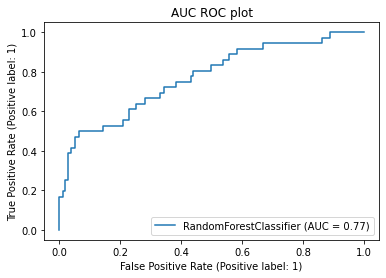

In [76]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gri.best_estimator_,x_test,y_test)
plt.title('AUC ROC plot')
plt.show

Final accuracy is 89% and AUC score is 77% which is decently good.

# Saving the model:

In [78]:
import pickle
filename='HR_analytics.pkl'
pickle.dump(gri.best_estimator_,open(filename,'wb'))


# Conclusion:

In [79]:
import numpy as np
a=np.array(y_test)
predicted=np.array(gri.best_estimator_.predict(x_test))
df_conclusion=pd.DataFrame({'Original':a,'Predicted':predicted},index=range(len(a)))
df_conclusion

,Original,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
284,0,0
285,1,0
286,0,0
287,0,0
